# Week 8 - Support Vector Machines
## Exercises

In [1]:
open_cells=False

In [2]:
%matplotlib inline

import os # locating directories

import numpy as np   # Arrays
import pandas as pd  # DataFrames

# Plotting
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['animation.embed_limit'] = 30000000.0
plt.rcParams['figure.dpi'] = 120
import seaborn as sns; sns.set()

from sklearn.datasets import load_iris           # for the Iris data
from IPython.display import Image                # displaying .png images
from sklearn.svm import SVC, LinearSVC           # SVM
from mpl_toolkits.mplot3d import Axes3D          # 3d plots
from sklearn.preprocessing import StandardScaler # scaling features
from sklearn.preprocessing import LabelEncoder   # binary encoding

from IPython.core.display import display, HTML

# colours for print()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
    
image_dir = os.path.join(os.getcwd(),"Images")

iris = load_iris(as_frame=True)  # data stored in a `sklearn.utils.Bunch`
iris_df = iris['data']           # get features DataFrame
target = iris['target']          # get target Series
# get the labels of flowers capitalised for visualisation
target_names = list(map(lambda s: s.capitalize(), iris['target_names']))
# create a dictionary with the original labels decoded (inverse of LabelEncoder)
decode_label = dict(zip(range(3), target_names))
# make a label encoder to use later if needed
le = LabelEncoder().fit(target_names)
# add the target labels to df for visualisation purposes
iris_vis = pd.concat([iris_df, target],axis=1)
# turn the ints to labels
iris_vis["target"] = iris_vis["target"].replace(decode_label)
# Capitalize column names for plotting
iris_vis.columns = [x.capitalize() for x in list(iris_vis.columns)]

## Question 1.
What is the fundemental idea behind "Maximal Margin Classifiers" (as well as their extensions "Support Vector Classifier" and "Support Vector Machines")?

In [3]:
answer = 'The fundamental idea behind Maximal Margin Classifiers is to fit the widest possible margin between the classes. In other words, the goal is to have the largest possible "street" between the decision boundary that separates the two classes and the training instances.'

if open_cells:
    display(HTML('<details open><summary>Click here for answer</summary>'+answer+'</details>'))
else:
    display(HTML('<details><summary>Click here for answer</summary>'+answer+'</details>'))

## Question 2.
What is a support vector?

In [4]:
answer = 'After training an SVM, a support vector is any instance located on the margin (see the previous answer), or between them when using soft margins (see later question). The decision boundary is entirely determined by the support vectors. Any instance that is not a support vector has no influence on the decision boundary. Computing the predictions only involves the support vectors, not the whole training set.'

if open_cells:
    display(HTML('<details open><summary>Click here for answer</summary>'+answer+'</details>'))
else:
    display(HTML('<details><summary>Click here for answer</summary>'+answer+'</details>'))

## Question 3.
In the plot below, which points are the "support vectors"?

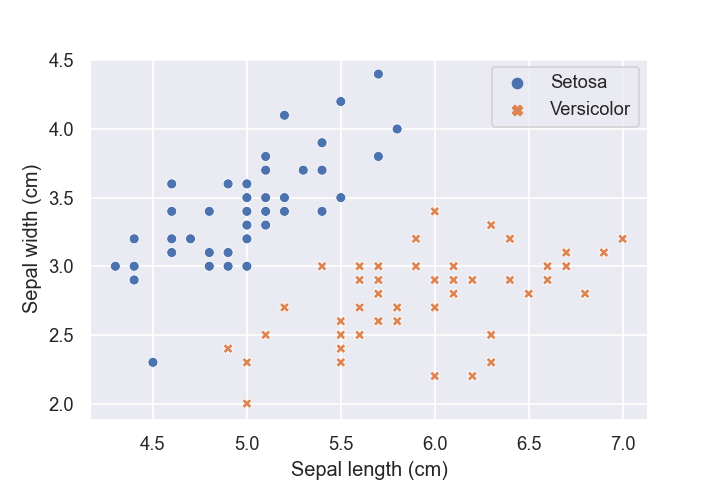

In [5]:
# Altered https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def svc_decision_boundary(clf, xmin=0, xmax=5.5, highlight=True, axes_limit = [0, 5.5, 0, 2]):
    w = clf.coef_[0]
    b = clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = clf.support_vectors_
    if highlight:
        g = sns.scatterplot(x = svs[:, 0], y = svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "g-", linewidth=2)
    plt.plot(x0, gutter_up, "r--", linewidth=2)
    plt.plot(x0, gutter_down, "r--", linewidth=2)
    
    plt.axis(axes_limit)


exersise_ = iris_vis[["Sepal length (cm)", "Sepal width (cm)", "Target"]]
exersise_ = exersise_[exersise_.Target != "Virginica"]

X = exersise_[["Sepal length (cm)", "Sepal width (cm)"]].values
y = le.transform(exersise_[["Target"]].values.ravel())

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)
w = svm_clf.coef_[0]
b = svm_clf.intercept_[0]

x0 = np.linspace(0, 5.5, 200)
decision_boundary = -w[0]/w[1] * x0 - b/w[1]
g = sns.scatterplot(data=exersise_, x = "Sepal length (cm)", 
                y = "Sepal width (cm)", hue="Target", 
                style = "Target")
g.axes.get_legend().set_title(False)
plt.savefig('Images/Exercises/Question3q.png')
plt.close()

svc_decision_boundary(svm_clf, 4.2, 7, axes_limit = [4.2, 7.2, 1.5, 5])
g = sns.scatterplot(data=exersise_, x = "Sepal length (cm)", 
                y = "Sepal width (cm)", hue="Target", 
                style = "Target")
g.axes.get_legend().set_title(False)
plt.savefig('Images/Exercises/Question3a.png')
plt.close()

display(Image(os.path.join("Images","Exercises","Question3q.png")))

In [6]:
answer = "It uses more than 1 here for each class, although which ones are quite tricky to discern. Don't worry if you got a few of the points wrong here, the main thing is to note that sometimes it can be more than one point per class!"

if open_cells:
    display(HTML('<details open><summary>Click here for answer</summary>'+answer+'</details>'),
            Image(os.path.join("Images","Exercises","Question3a.png")))
else:
    display(HTML('<details><summary>Click here for answer</summary>'+answer+'<img src="Images/Exercises/Question3a.png">'+'</details>'))

## Question 4.

Sketch or code (using Python) the following two dimensional hyperplanes, indicating where $1 + 3X_1 - X_2 > 0$ and where $1 + 3X_1 - X_2 < 0$.

a. $1 + 3X_1 - X_2 = 0$

In [7]:
x1 = np.linspace(-5.0, 5.0, 100)
x2 = np.linspace(-5.0, 5.0, 100)
X1, X2 = np.meshgrid(x1,x2)
a = 1 + 3*X1 -X2
plt.contour(X1, X2, a, [0])
plt.text(-4, 0, "$1 + 3X_1 - X_2 < 0$")
plt.text(1, 0, " $1 + 3X_1 - X_2 > 0$")

plt.suptitle("4a. $1 + 3X_1 - X_2 = 0$")

plt.savefig('Images/Exercises/Question4a.png')
plt.close()

In [8]:
image = '<img src="Images/Exercises/Question4a.png">'
if open_cells:
    display(HTML('<details open><summary>Click here for answer</summary>'+'</details>'),
            Image(os.path.join("Images","Exercises","Question4a.png"))
           )
else:
    display(HTML('<details><summary>Click here for answer</summary>'+image+'</details>'))

b. $-2 + X_1 + 2X_2 = 0$

In [9]:
x1 = np.linspace(-5.0, 5.0, 100)
x2 = np.linspace(-5.0, 5.0, 100)
X1, X2 = np.meshgrid(x1,x2)
b = -2 + X1 + 2*X2
plt.contour(X1, X2, b, [0])
plt.text(-4, -2, "$-2 + X_1 + 2X_2 < 0$")
plt.text(1, 2, " $-2 + X_1 + 2X_2 > 0$")

plt.suptitle("4b. $-2 + X_1 + 2X_2 = 0$")

plt.savefig('Images/Exercises/Question4b.png')
plt.close()

In [10]:
if open_cells:
    display(HTML('<details open><summary>Click here for answer</summary>'+'</details>'),
            Image(os.path.join("Images","Exercises","Question4b.png")))
else:
    image = '<img src="Images/Exercises/Question4b.png">'
    display(HTML('<details><summary>Click here for answer</summary>'+image+'</details>'))

## Question 5. 

Fundamentally, how are "Support Vector Classifier" and "Support Vector Machines" extensions of "Maximal Margin Classifiers"?

In [11]:
answer = 'When using a Support Vector Classifier (or soft margin classification), the SVC searches for a compromise between perfectly separating the two classes and having the widest possible street (i.e., a few instances may end up on the street). <br><br> Support Vector Machines use kernels when training on nonlinear datasets.'

if open_cells:
    display(HTML('<details open><summary>Click here for answer</summary>'+answer+'</details>'))
else:
    display(HTML('<details><summary>Click here for answer</summary>'+answer+'</details>'))

## Question 6. 

If $C$ is large for a support vector classifier in Scikit-Learn, will there be more or less support vectors than if $C$ is small? Explain your answer.

In [12]:
answer = 'When the tuning parameter $C$ is large in Scikit-Learn, then there are less support vectors, meaning fewer observations are involved in determining the hyperplane. The strength of the regularization is inversely proportional to $C$, meaning a large $C$ has a higher penelty.'

if open_cells:
    display(HTML('<details open><summary>Click here for answer</summary>'+answer+'</details>'))
else:
    display(HTML('<details><summary>Click here for answer</summary>'+answer+'</details>'))

## Question 7.
Is the "confidence score" output from a SVM classifier the same as a "probability score"?

In [13]:
answer = 'No, the output of the SVM, the distance between the test instance and the decision boundary, cannot be directly converted into an estimation of the class probability. <br><br><b>Note</b> If you set <code>probability=True</code> when creating an SVM in Scikit-Learn, then after training it will calibrate the probabilities using Logistic Regression on the SVM’s scores (trained by an additional five-fold cross-validation on the training data). This will add the <code>predict_proba()</code> and <code>predict_log_proba()</code> methods to the SVM.'

if open_cells:
    display(HTML('<details open><summary>Click here for answer</summary>'+answer+'</details>'))
else:
    display(HTML('<details><summary>Click here for answer</summary>'+answer+'</details>'))

## Question 8.
Say you trained an SVM classifier with an RBF kernel. It seems to underfit the training set: should you increase or decrease $\gamma$ (`gamma`) and/or $C$?

In [14]:
answer = 'If an SVM classifier trained with an RBF kernel underfits the training set, there might be too much regularization. To decrease it, you need to increase <code>gamma</code> or <code>C</code> (or both).'

if open_cells:
    display(HTML('<details open><summary>Click here for answer</summary>'+answer+'</details>'))
else:
    display(HTML('<details><summary>Click here for answer</summary>'+answer+'</details>'))

In [15]:
if open_cells:
    # For pdf conversion
    !jupyter nbconvert SVM_Exercises.ipynb \
        --to html \
        --output-dir ./PDF_Prep \
        --output SVM_Exercises_Answers \
        --template classic \
        --TemplateExporter.exclude_input=True
else:
    # Create HTML document - need to run it a few times
    # as its a little unpredictable
    !jupyter nbconvert SVM_Exercises.ipynb \
        --to html \
        --output-dir . \
        --output SVM_Exercises \
        --template classic \
        --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook SVM_Exercises.ipynb to html
[NbConvertApp] Writing 344351 bytes to SVM_Exercises.html
